In [8]:
# importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset extracted after missing value imputation
df = pd.read_csv('../data/gurgaon_properties(missing_value_imputation).csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.29,9021.0,3,3,3,7.0,Relatively New,1540.0,1,0,0,0,0,2,174
1,flat,ireo the grand arch,sector 58,2.20,16000.0,2,2,1,5.0,Relatively New,1528.0,0,0,0,1,0,1,49
2,flat,ireo victory valley,sector 67,2.95,12110.0,3,3,3+,14.0,Moderately Old,2236.0,0,1,0,1,0,1,165
3,flat,puri emerald bay,sector 104,2.23,9911.0,3,4,3+,10.0,Relatively New,2360.0,0,1,0,0,0,1,159
4,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Relatively New,1548.0,0,0,0,0,0,2,0


In [4]:
df.shape

(3603, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3603 entries, 0 to 3602
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3603 non-null   object 
 1   society          3603 non-null   object 
 2   sector           3603 non-null   object 
 3   price            3603 non-null   float64
 4   price_per_sqft   3603 non-null   float64
 5   bedRoom          3603 non-null   int64  
 6   bathroom         3603 non-null   int64  
 7   balcony          3603 non-null   object 
 8   floorNum         3603 non-null   float64
 9   agePossession    3603 non-null   object 
 10  built_up_area    3603 non-null   float64
 11  study room       3603 non-null   int64  
 12  servant room     3603 non-null   int64  
 13  store room       3603 non-null   int64  
 14  pooja room       3603 non-null   int64  
 15  others           3603 non-null   int64  
 16  furnishing_type  3603 non-null   int64  
 17  luxury_score  

In the building the prediction model for predicting the property price we don't require the society and price_per_sqft columns

In [6]:
train_df = df.drop(columns=['society', 'price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 90,1.29,3,3,3,7.0,Relatively New,1540.0,1,0,0,0,0,2,174
1,flat,sector 58,2.20,2,2,1,5.0,Relatively New,1528.0,0,0,0,1,0,1,49
2,flat,sector 67,2.95,3,3,3+,14.0,Moderately Old,2236.0,0,1,0,1,0,1,165
3,flat,sector 104,2.23,3,4,3+,10.0,Relatively New,2360.0,0,1,0,0,0,1,159
4,flat,sector 108,0.70,2,2,3,1.0,Relatively New,1548.0,0,0,0,0,0,2,0


In [ ]:
train_df.select_dtypes(exclude='object')

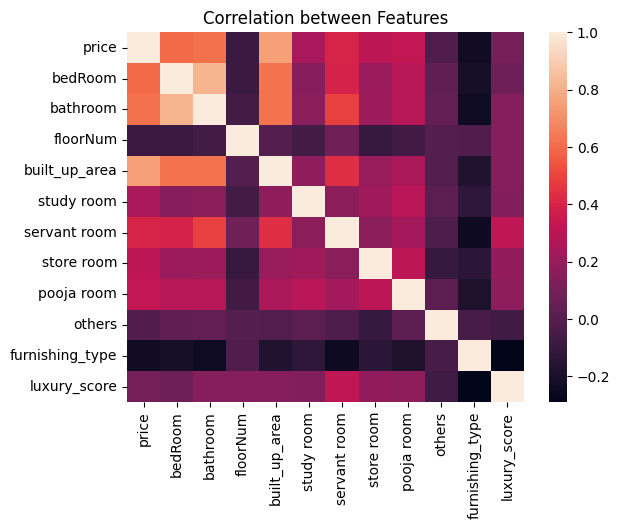

In [12]:
# checking correlatin between the features
sns.heatmap(train_df.select_dtypes(exclude='object').corr())
plt.title('Correlation between Features')
plt.show()

In [14]:
# checking correlation of features with price column
train_df.select_dtypes(exclude='object').corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.750498
bathroom           0.615960
bedRoom            0.598475
servant room       0.399023
pooja room         0.328097
store room         0.311013
study room         0.246688
luxury_score       0.096372
others            -0.019733
floorNum          -0.089836
furnishing_type   -0.229362
Name: price, dtype: float64

Observations: -
- There is strong positive correlation between price and built_up_area
- Price is showing negative correlation with floorNum and furnishing_type which means that variation in property pricing is not dependent on the floor number or the furnishing type.

**`luxury_score` column**

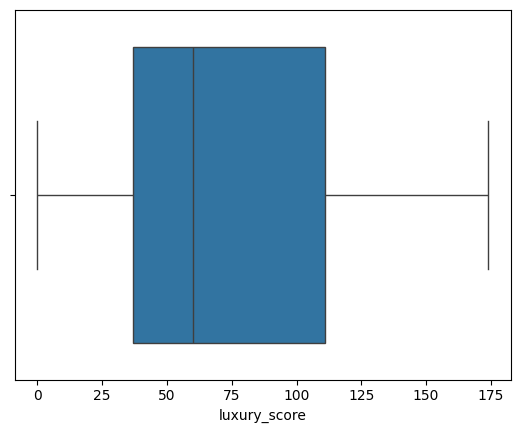

In [16]:
sns.boxplot(x=df['luxury_score'])
plt.show()

In [17]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [18]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [19]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.29,9021.0,3,3,3,7.0,Relatively New,1540.0,1,0,0,0,0,2,174
1,flat,ireo the grand arch,sector 58,2.20,16000.0,2,2,1,5.0,Relatively New,1528.0,0,0,0,1,0,1,49
2,flat,ireo victory valley,sector 67,2.95,12110.0,3,3,3+,14.0,Moderately Old,2236.0,0,1,0,1,0,1,165
3,flat,puri emerald bay,sector 104,2.23,9911.0,3,4,3+,10.0,Relatively New,2360.0,0,1,0,0,0,1,159
4,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Relatively New,1548.0,0,0,0,0,0,2,0


**`floorNum` column**

<Axes: xlabel='floorNum'>

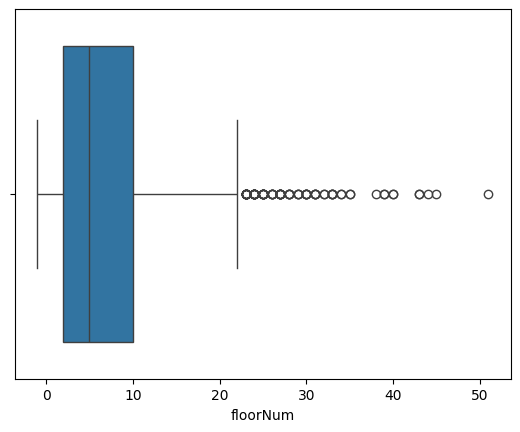

In [20]:
sns.boxplot(x=df['floorNum'])

In [21]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [22]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [24]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 90,1.29,3,3,3,7.0,Relatively New,1540.0,1,0,0,0,0,2,174,High,Mid Floor
1,flat,sector 58,2.20,2,2,1,5.0,Relatively New,1528.0,0,0,0,1,0,1,49,Low,Mid Floor
2,flat,sector 67,2.95,3,3,3+,14.0,Moderately Old,2236.0,0,1,0,1,0,1,165,High,High Floor
3,flat,sector 104,2.23,3,4,3+,10.0,Relatively New,2360.0,0,1,0,0,0,1,159,High,Mid Floor
4,flat,sector 108,0.70,2,2,3,1.0,Relatively New,1548.0,0,0,0,0,0,2,0,Low,Low Floor


In [25]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [26]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 90,1.29,3,3,3,Relatively New,1540.0,1,0,0,0,0,2,High,Mid Floor
1,flat,sector 58,2.20,2,2,1,Relatively New,1528.0,0,0,0,1,0,1,Low,Mid Floor
2,flat,sector 67,2.95,3,3,3+,Moderately Old,2236.0,0,1,0,1,0,1,High,High Floor
3,flat,sector 104,2.23,3,4,3+,Relatively New,2360.0,0,1,0,0,0,1,High,Mid Floor
4,flat,sector 108,0.70,2,2,3,Relatively New,1548.0,0,0,0,0,0,2,Low,Low Floor
